In [1]:

#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

inputfile = "./static/data/clean_redwineq.csv"

In [2]:
wine_df = pd.read_csv(inputfile)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,quality_label
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,excellent
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,excellent
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,excellent
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,excellent
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,excellent


In [3]:
# Drop type and quality_label columns
wine_df.drop(["quality_label"],
            axis = "columns", inplace=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8


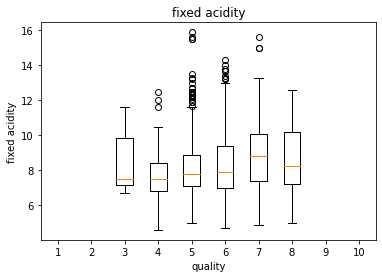

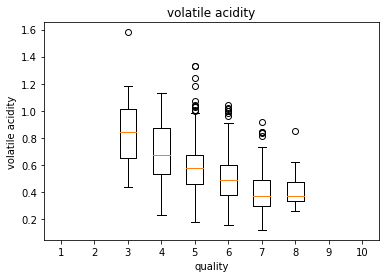

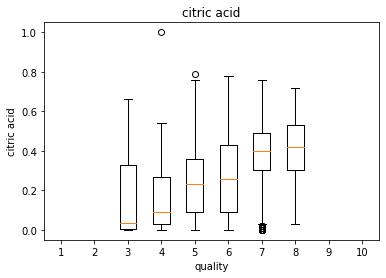

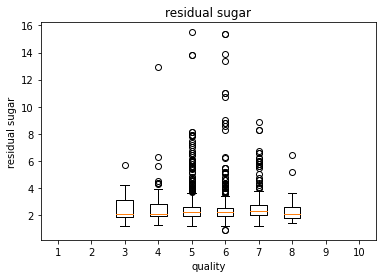

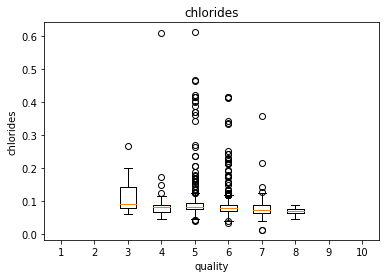

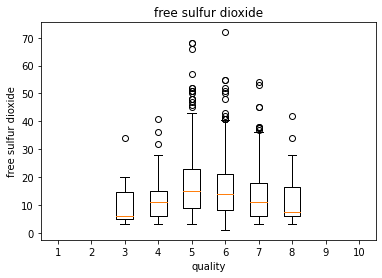

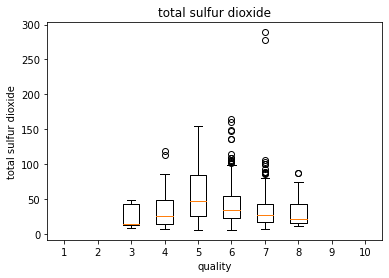

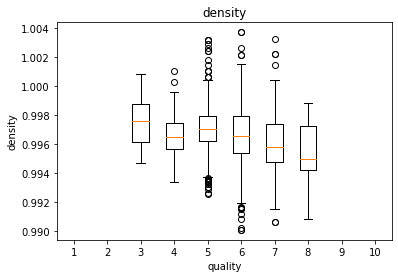

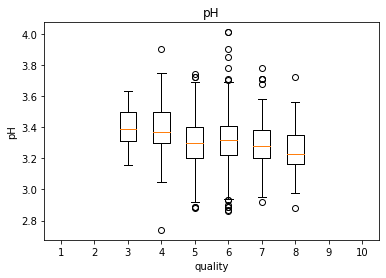

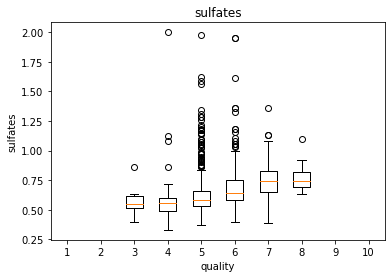

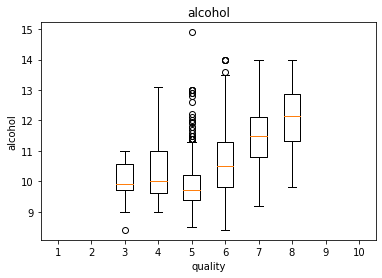

In [5]:
# Initial Visual Analysis
for label in wine_df.columns[:-1]:
    plt.boxplot([wine_df[wine_df['quality']==i][label]for i in range(1,11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig("static/img/"+'red'.join(label.split(' ')))
    plt.show()

In [6]:
#The above boxplots show us that there is not that much deviation in the ingredients between the quality-codes.  Also, there is no data for 1 and 2 or 9 and 10.

# Gathering the training and testing data

In [7]:
#Creating three quality bins: low(1), mid(1) and high(2)
bins = [0, 5.5, 7.5, 10] #this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
wine_df['quality'] = pd.cut(wine_df['quality'], bins=bins, labels=labels)

In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,2
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,2
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,2
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,2
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,2


In [9]:
# Standardize the data
x = wine_df[wine_df.columns[:-1]]
y = wine_df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42) # this translates to 80% training data and 20% (.2) testing data

In [10]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       662
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      175
Name: quality, dtype: int64


# K-Nearest Neighbor

In [11]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       144
           1       0.75      0.78      0.76       175
           2       0.00      0.00      0.00         1

    accuracy                           0.73       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.74      0.73      0.73       320

0.7036724901574802


In [12]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       144
           1       0.72      0.79      0.75       175
           2       0.00      0.00      0.00         1

    accuracy                           0.72       320
   macro avg       0.48      0.48      0.48       320
weighted avg       0.72      0.72      0.72       320

0.7107221948818898


C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Accuracy rate for 3 nearest neighbors is approx. 71%, for 5 nearest neighbors is approx. 70%.

# Random Forest Classifier

In [14]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       144
           1       0.82      0.82      0.82       175
           2       0.00      0.00      0.00         1

    accuracy                           0.80       320
   macro avg       0.53      0.54      0.54       320
weighted avg       0.80      0.80      0.80       320

0.791240157480315


In [15]:
# The accuracy rate for the Random Forest Classifier is approximately 79%

# Decision Tree Classifier

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       144
           1       0.77      0.77      0.77       175
           2       0.00      0.00      0.00         1

    accuracy                           0.75       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.75      0.75      0.75       320

0.7255967027559056


In [17]:
# The accuracy rate for the Decision Tree Classifier is approximately 73%

# Stochastic Gradient Descent

In [18]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       144
           1       0.77      0.77      0.77       175
           2       0.00      0.00      0.00         1

    accuracy                           0.75       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.75      0.75      0.75       320

0.7083907480314962


In [19]:
# The accuracy rate for the Stochastic Gradient Descent is approximately 71%

# Trying to improve results

In [20]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# maximum number of level in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
#print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.1s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.1s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.9s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   0.2s
[CV] END bootstrap=True, max_depth=76, max

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=   0.5s
[CV] END bootstrap=True, max_depth=6

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.4s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.4s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   1.4s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=65,

[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=   1.9s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=   1.8s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.7s
[CV] END bootstrap=True, max_depth=

In [21]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       144
           1       0.82      0.81      0.81       175
           2       0.00      0.00      0.00         1

    accuracy                           0.80       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.79      0.80      0.80       320

{'n_estimators': 894, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kate_\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Credit: Kylie Ying - https://www.youtube.com/channel/UCKMjvg6fB6WS5WrPtbV4F5g